# Rotinas para plotagem dos gráficos com as componentes do Campo Geomagnéticos observados em VSS e suas variações seculares

Importando as bibliotecas necessárias

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import glob
import pandas as pd
import math as math
import os

* Importando o arquivo contendo os dados (`Dados observados do Observatório de Vassouras`).
VSS é a variável (uma matriz) que armazena as colunas de 1 a 9 do arquivo medias_anuais.csv.

In [6]:
np.loadtxt(fname='medias_anuais.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7,8,9))
VSS= np.loadtxt(fname='medias_anuais.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7,8,9))

* Caso queira verificar a Matriz importada, retire o comentário antes da sentença abaixo. 

In [7]:
#np.loadtxt(fname='medias_anuais.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7,8,9))

* Importando o arquivo contendo os dados do modelo IGRF

In [8]:
igrf = np.loadtxt(fname='vassouritas_python.csv', delimiter=';')

### Convertendo de grau min para grau decimal

* ** As informações sobre declinação e Inclinação no arquivo `medias_anuais.csv` estão em grau e minuto e no arquivo IGRF estão
em graus e decimal. O ideal é que estejam todos em grau e decimal. Na celula abaixo declaramos *I1* como a parte em grau e *I2*
como a parte em minutos.** 

A parte em minutos (I2) Será convertida para decimal usando a função **deg2decim(a,b)** e depois será somada a I1.


O mesmo vale para D

In [9]:
I1 = np.array(VSS[:,3]) #!Parte contendo o grau

I2 = np.array(VSS[:,4]) #!Parte contendo o min

D1 = np.array(VSS[:,1]) #!Parte contendo o grau

D2 = np.array(VSS[:,2]) #!Parte contendo o min

In [10]:
def deg2decim(a, b):
    "convert values of a np.array in deg(°) min(') seg('') to decimals values."
    '''
    a - degree column
    b - min / sec column
    '''
    
    min = (1./60) * b 
    decim = a - min
    
        
    return decim

In [11]:
I = deg2decim(I1, I2) #Converting Inclination data from deg/min/seg to degree.decimals

In [12]:
D = deg2decim(D1,D2) #Converting Declination data from deg/min/seg to degree.decimals

In [13]:
#print(I) #verificando a medida

### Após obtenção de I e D em graus decimal iremos atualizar a matriz VSS

In [17]:
VSSdata = np.array(np.column_stack((VSS[:,0], D, I, VSS[:,5:10])))

# Obtenção da variação secular (VS) de cada componete do campo principal.

### Usando a função `sec_var(a)` iremos determinar para cada compnente (x,y, z, f, i, h e d)

*Os cálculos foram feitos para os dados de vassouras e tbem para o modelo igrf (nesse já havia os valores de VS, entretanto não parecia muito confiável).

In [18]:
def sec_var(a):
    "determine secular variation for components of geomagnetic field."
    '''
    a - column data
    '''
    
    N = a.size
    sv = np.zeros(N)
    
    for i in range(N-1):
        sv[i+1] = a[i+1] - a[i]
    
    return sv

In [20]:
#SECULAR VARIATION FOR VASSOURAS MAGNETIC OBSERVATORY DATA FROM 1915 TO 2008:
  
sv_d = sec_var(VSSdata[:,1])
sv_i = sec_var(VSSdata[:,2])
sv_x = sec_var(VSSdata[:,4])
sv_y = sec_var(VSSdata[:,5])
sv_z = sec_var(VSSdata[:,6])
sv_f = sec_var(VSSdata[:,7])


#SECULAR VARIATION FROM IGRF FO VASSOURAS MAGNETIC OBSERVATORY DATA FROM 1915 TO 2008:
igrf_svd = sec_var(igrf[:,1])
igrf_svi = sec_var(igrf[:,3])
igrf_svx = sec_var(igrf[:,7])
igrf_svy = sec_var(igrf[:,9])
igrf_svz = sec_var(igrf[:,11])
igrf_svf = sec_var(igrf[:,13])



#print(igrf_svy,sv_y)

* Rever save

In [35]:
np.savetxt('teste.txt', VSSdata, delimiter=';')

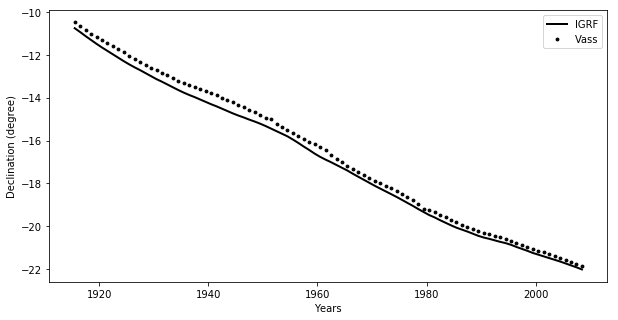

In [45]:
yr= VSSdata[:,0]
d = VSSdata[:,1]
igrf_d = igrf[:,1]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,d , 8, label="Vass", color='black')
IGRF = plt.plot(yr,igrf_d, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('Declination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('Declination (degree)')
plt.xlabel('Years')
plt.show()

fig.savefig('D.png', dpi=300)

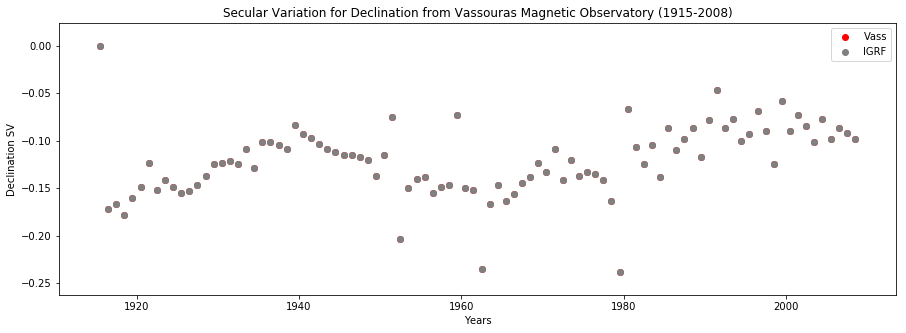

In [41]:
data = medias_anuais2
yr= data[:,0]
sv_d = sec_var(data[:,1])
igrf_svd = sec_var(igrf[:,1])

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,sv_d, label="Vass", color='red')
IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('Declination SV')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_D.png', dpi=300)

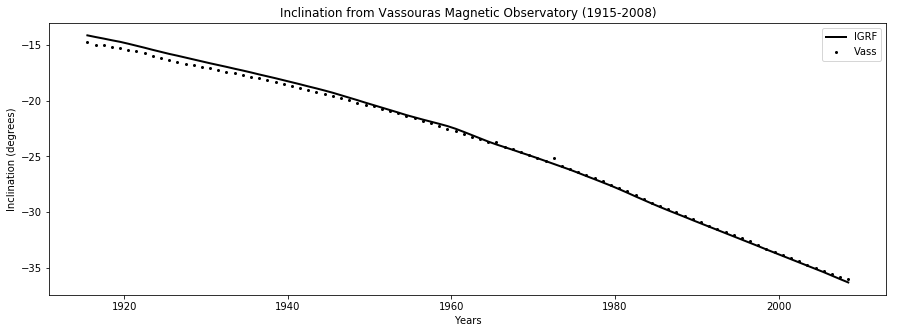

In [42]:
data = medias_anuais2
yr = data[:,0]
i = data[:,2]
igrf_i = igrf[:,3]

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,i, 4, label="Vass", color='black')
IGRF = plt.plot(yr,igrf_i, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('Inclination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('Inclination (degrees)')
plt.xlabel('Years')
plt.show()

fig.savefig('I.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A802ABBF28>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


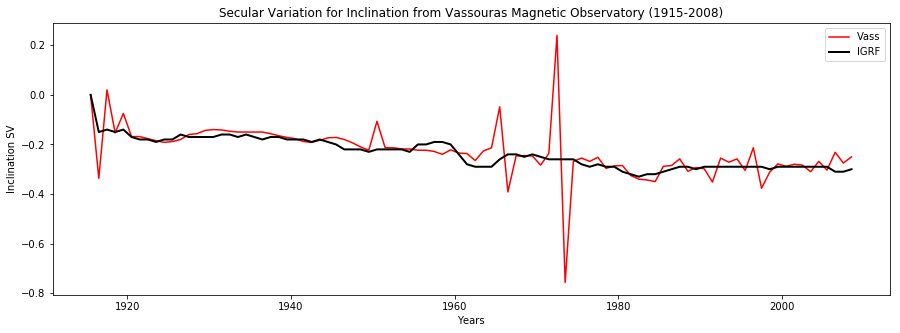

In [43]:
data = medias_anuais2
yr= data[:,0]
sv_i 
igrf_svi 

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.plot(yr,sv_i, label="Vass", color='red')
IGRF = plt.plot(yr,igrf_svi, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('Secular Variation for Inclination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('Inclination SV')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_I.png', dpi=300)

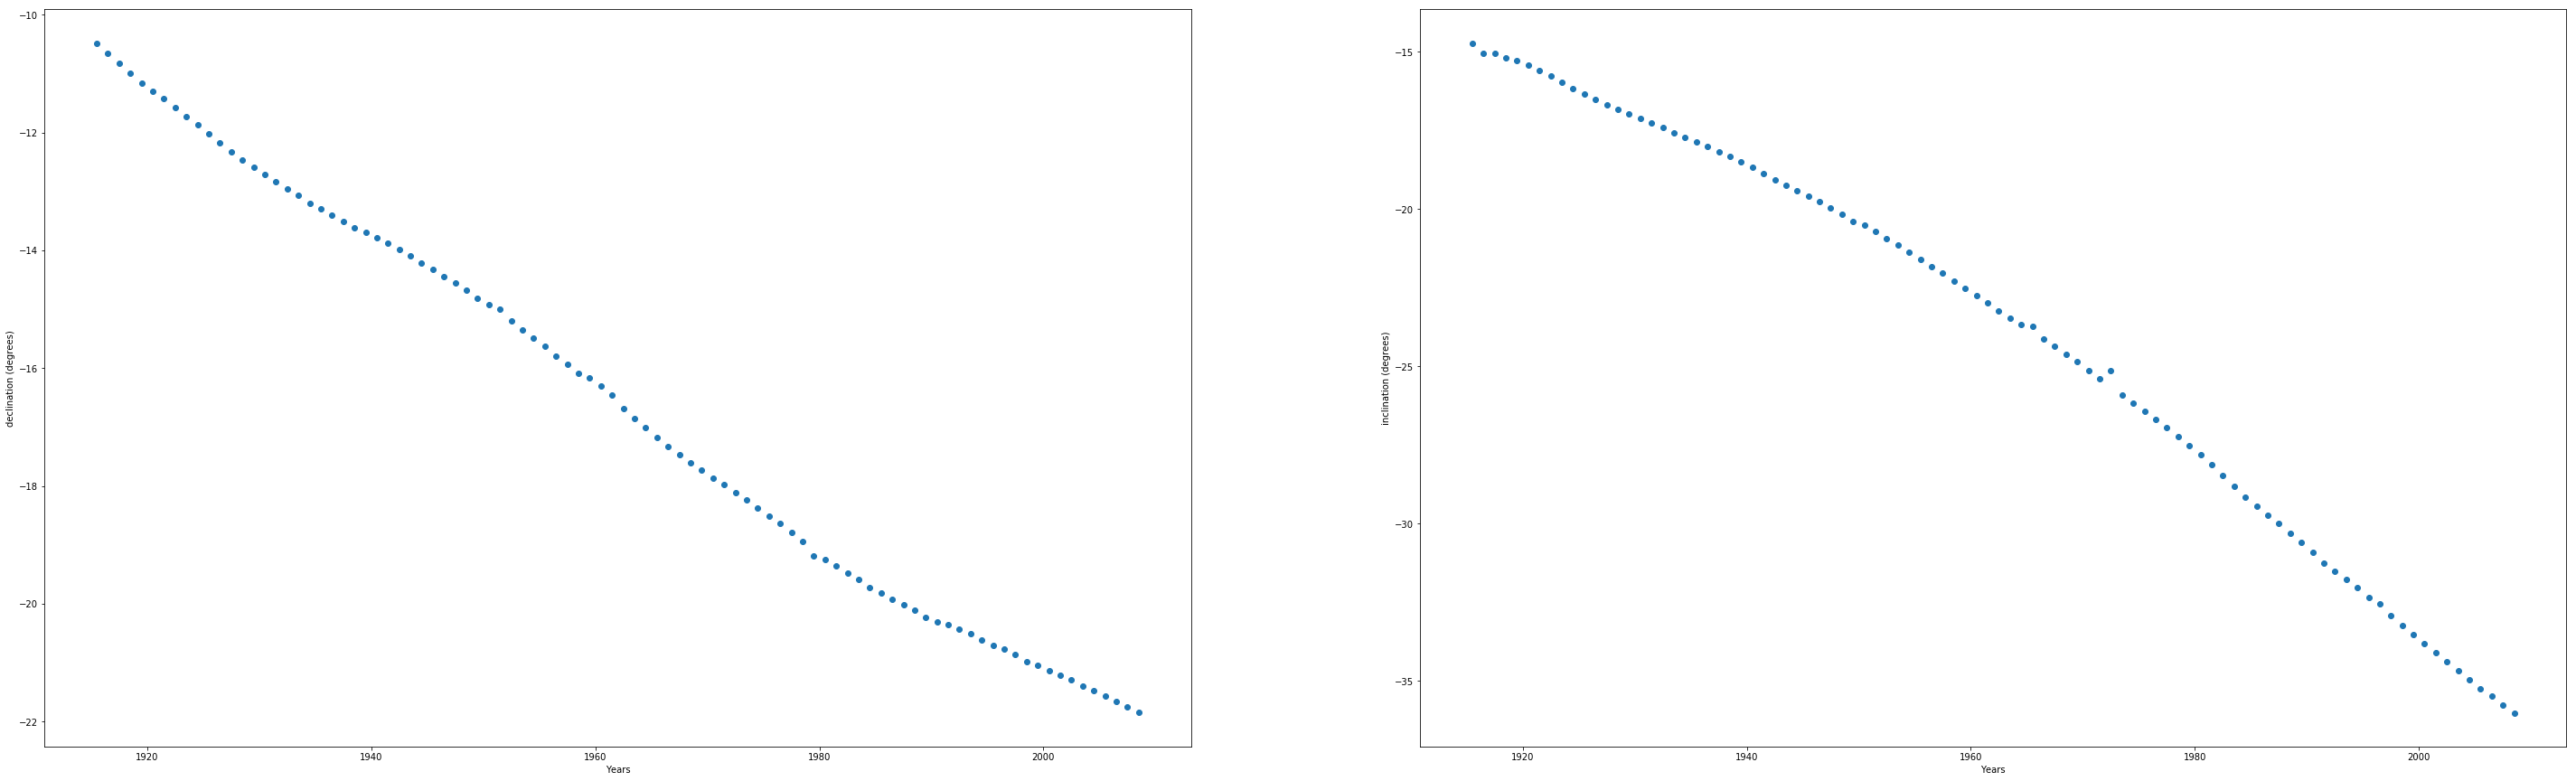

In [44]:
fig = plt.figure(figsize=(50.0, 15.0))

dcli = fig.add_subplot(1, 2, 1)
icli = fig.add_subplot(1, 2, 2)

data = medias_anuais2
x = data[:,0]
i = data[:,2]
d = data[:,1]

dcli.scatter(x,d)
icli.scatter(x,i)

icli.set_ylabel('inclination (degrees)')
icli.set_xlabel('Years')

dcli.set_ylabel('declination (degrees)')
dcli.set_xlabel('Years')



plt.show()

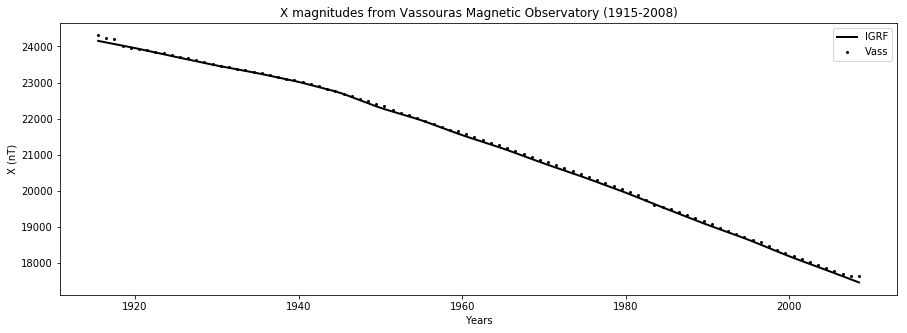

In [45]:
data = medias_anuais2
yr = data[:,0]
x = data[:,4]
igrf_x = igrf[:,7]

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,x, 4, label="Vass", color='black')
IGRF = plt.plot(yr,igrf_x, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('X magnitudes from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()

plt.ylabel('X (nT)')
plt.xlabel('Years')
plt.show()

fig.savefig('X.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A802670BE0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


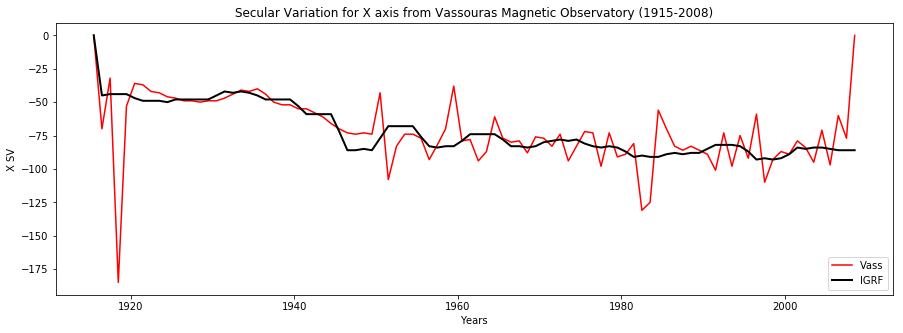

In [46]:
data = medias_anuais2
yr= data[:,0]
sv_x 
igrf_svx 

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.plot(yr,sv_x, label="Vass", color='red')
IGRF = plt.plot(yr,igrf_svx, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('Secular Variation for X axis from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('X SV')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_X.png', dpi=300)

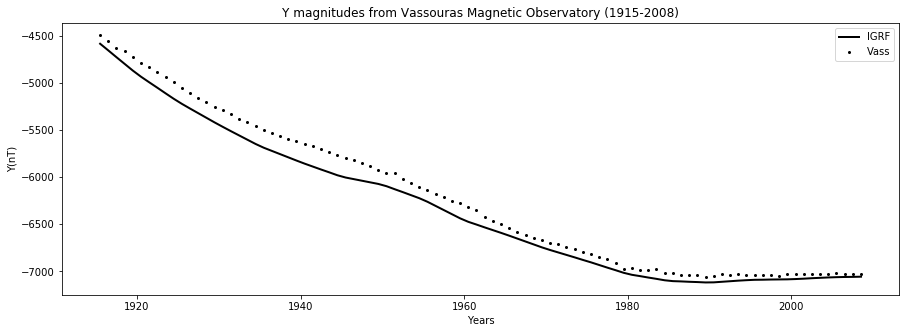

In [47]:
data = medias_anuais2
yr = data[:,0]
y = data[:,5]
igrf_y = igrf[:,9]

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,y, 4, label="Vass", color='black')
IGRF = plt.plot(yr,igrf_y, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('Y magnitudes from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()

plt.ylabel('Y(nT)')
plt.xlabel('Years')
plt.show()

fig.savefig('Y.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A80378E7B8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


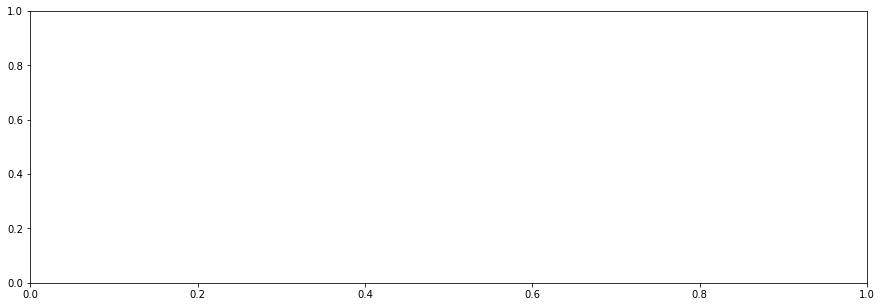

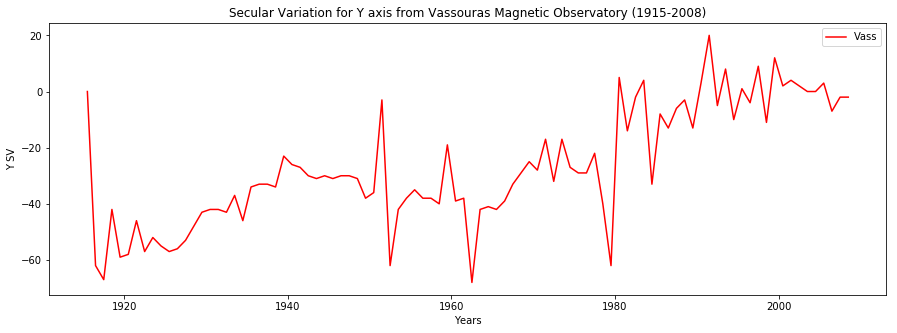

In [70]:
data = medias_anuais2
yr= data[:,0]
sv_y
igrf_svy

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.plot(yr,sv_y, label="Vass", color='red')
#IGRF = plt.scatter(yr,igrf_svy, label="IGRF", color='black', linewidths=0.1)

plt.title('Secular Variation for Y axis from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('Y SV')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_Y.png', dpi=300)

In [63]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

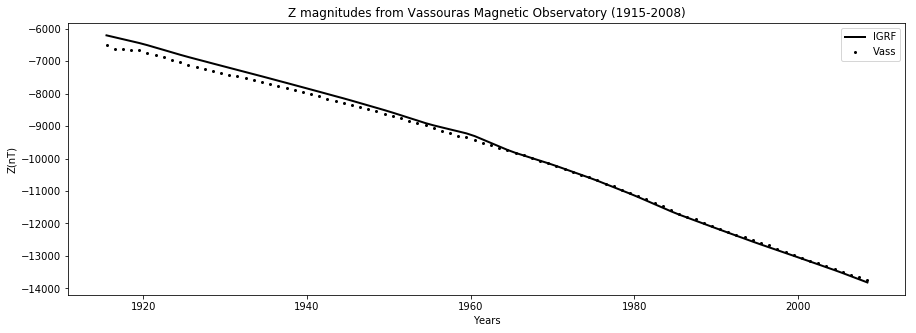

In [49]:
data = medias_anuais2
yr = data[:,0]
z = data[:,6]
igrf_z = igrf[:,11]

fig = plt.figure(figsize=(15.0, 5.0))


Vass = plt.scatter(yr,z, 4, label="Vass", color='black')
IGRF = plt.plot(yr,igrf_z, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('Z magnitudes from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()

plt.ylabel('Z(nT)')
plt.xlabel('Years')
plt.show()

fig.savefig('Z.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002A8025A1898>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


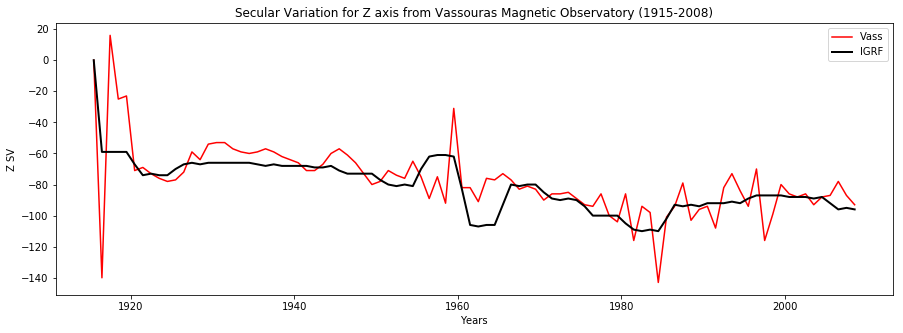

In [50]:
data = medias_anuais2
yr= data[:,0]
sv_z
igrf_svz

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.plot(yr,sv_z, label="Vass", color='red')
IGRF = plt.plot(yr,igrf_svz, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('Secular Variation for Z axis from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('Z SV')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_Z.png', dpi=300)

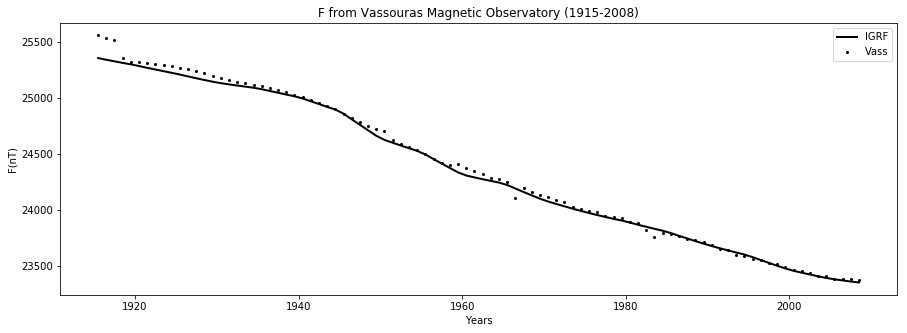

In [51]:
data = medias_anuais2
yr = data[:,0]
f = data[:,7]
igrf_f = igrf[:,13]

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,f, 4, label="Vass", color='black')
IGRF = plt.plot(yr,igrf_f, label="IGRF", linestyle='solid', color='black', linewidth=2)

plt.title('F from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()

plt.ylabel('F(nT)')
plt.xlabel('Years')
plt.show()


fig.savefig('F.png', dpi=300)

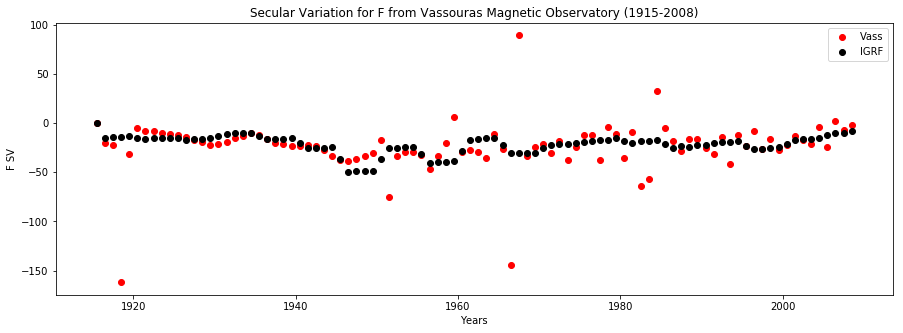

In [55]:
data = medias_anuais2
yr= data[:,0]
sv_f
igrf_svf

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,sv_f, label="Vass", color='red')
IGRF = plt.scatter(yr,igrf_svf, label="IGRF", color='black')

plt.title('Secular Variation for F from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('F SV')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_F.png', dpi=300)

In [ ]:
help(plt.savefig)